In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from patsy import dmatrices
import sklearn
import seaborn as sns

In [3]:
walmart_store = pd.read_csv("~/gradable/Walmart_Store_sales.csv")
walmart_store.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
walmart_store_groupby = walmart_store.groupby('Store')['Weekly_Sales'].sum()
print("Store Number {} has maximum Sales. Sum of Total Sales {}".format(walmart_store_groupby.idxmax
(),walmart_store_groupby.max()))

Store Number 20 has maximum Sales. Sum of Total Sales 301397792.46000004


<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

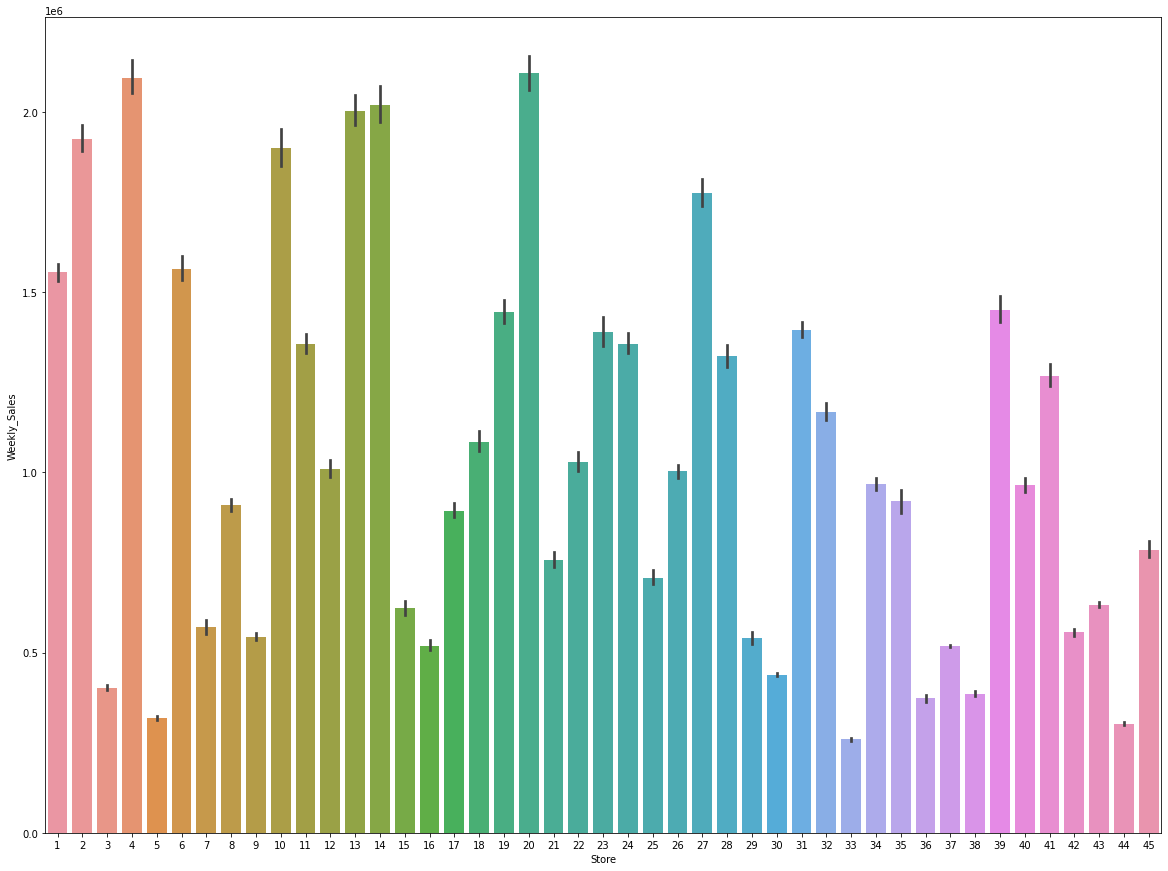

In [41]:
plt.figure(figsize=(20,15))
sns.barplot(x=walmart_store.Store, y = walmart_store.Weekly_Sales)

In [5]:
walmart_store_std = walmart_store.groupby('Store').agg({'Weekly_Sales':'std'})
print("Store Number {} has maximum Standard Deviation. STD {}".format(walmart_store_std['Weekly_Sales'
].idxmax(),walmart_store_std['Weekly_Sales'].max()))


Store Number 14 has maximum Standard Deviation. STD 317569.9494755081


In [6]:
walmart_store_std = walmart_store.groupby('Store').agg({'Weekly_Sales':['mean','std']})
walmart_store_std.head()

Weekly_Sales               
               mean            std
Store                             
1      1.555264e+06  155980.767761
2      1.925751e+06  237683.694682
3      4.027044e+05   46319.631557
4      2.094713e+06  266201.442297
5      3.180118e+05   37737.965745

In [43]:
coefficient = ((walmart_store.groupby('Store')['Weekly_Sales'].std())/(walmart_store.groupby('Store')['Weekly_Sales'].mean()))*100

print("And Maximum Coefficient of variation is for the Store No. {} ".format(coefficient.idxmax()))

And Maximum Coefficient of variation is for the Store No. 35 


C:\Users\RIBALANG\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weekly_Sales', ylabel='Density'>

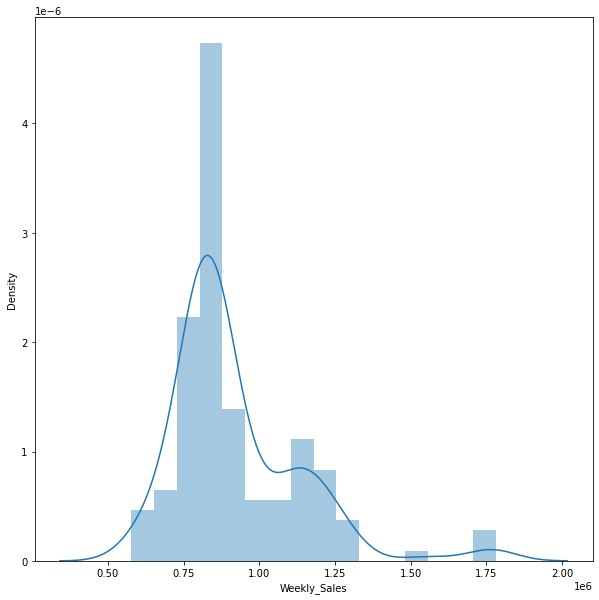

In [44]:
stores = walmart_store.groupby('Store')
store_35 = stores.get_group(35)
plt.figure(figsize=(10,10))
sns.distplot(store_35.Weekly_Sales)

##Clearly in this distribution plot for store 35 you can see how the weekly_sales are distributed, it is rightly skewed and giving the intutions that sales are centred around 800000

In [8]:
walmart_store_Q32012 = walmart_store[(pd.to_datetime(walmart_store['Date']) >= pd.to_datetime('07-01-2012')) & (pd.to_datetime(walmart_store['Date']) <= pd.to_datetime('09-30-2012'))]
walmart_store_growth = walmart_store_Q32012.groupby(['Store'])['Weekly_Sales'].sum()
print("Store Number {} has Good Quartely Growth in Q3'2012 {}".format(walmart_store_growth.idxmax(),walmart_store_growth.max()))

Store Number 4 has Good Quartely Growth in Q3'2012 25652119.35


# Sales During a Holiday Week and  nonholiday

In [47]:

walmart_store['Date'] = pd.to_datetime(walmart_store.Date, format = '%d-%m-%Y')
walmart_store['Year'], walmart_store['Month'] = walmart_store['Date'].dt.year, walmart_store['Date'].dt.month
holiday_group = walmart_store.groupby('Holiday_Flag',sort=False)
holiday_week = holiday_group.get_group(1)
display(holiday_week.shape)
display(holiday_week.info())
display(holiday_week.describe())
display(holiday_week.head())

(450, 10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450 entries, 1 to 6427
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         450 non-null    int64         
 1   Date          450 non-null    datetime64[ns]
 2   Weekly_Sales  450 non-null    float64       
 3   Holiday_Flag  450 non-null    int64         
 4   Temperature   450 non-null    float64       
 5   Fuel_Price    450 non-null    float64       
 6   CPI           450 non-null    float64       
 7   Unemployment  450 non-null    float64       
 8   Year          450 non-null    int64         
 9   Month         450 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(4)
memory usage: 38.7 KB


None

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
count,450.000000,4.500000e+02,450.0,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,23.000000,1.122888e+06,1.0,50.232044,3.227464,171.268092,8.074127,2010.800000,7.900000
std,13.001627,6.276849e+05,0.0,20.071118,0.407934,39.291449,1.879293,0.749164,4.015699
min,1.000000,2.153592e+05,1.0,10.240000,2.513000,126.114581,4.077000,2010.000000,2.000000
25%,12.000000,5.758655e+05,1.0,33.367500,2.943000,131.586613,7.015000,2010.000000,2.000000
50%,23.000000,1.018538e+06,1.0,47.870000,3.179000,182.598178,7.890000,2011.000000,9.000000
75%,34.000000,1.555213e+06,1.0,67.335000,3.546000,211.760416,8.625000,2011.000000,11.000000
max,45.000000,3.004702e+06,1.0,96.220000,4.124000,226.210354,14.313000,2012.000000,12.000000


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2
31,1,2010-09-10,1507460.69,1,78.69,2.565,211.495190,7.787,2010,9
42,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838,2010,11
47,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838,2010,12
53,1,2011-02-11,1649614.93,1,36.39,3.022,212.936705,7.742,2011,2


In [48]:
non_holiday_week = holiday_group.get_group(0)
non_holiday_week.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3
5,1,2010-03-12,1439541.59,0,57.79,2.667,211.380643,8.106,2010,3


<AxesSubplot:xlabel='Date', ylabel='Weekly_Sales'>

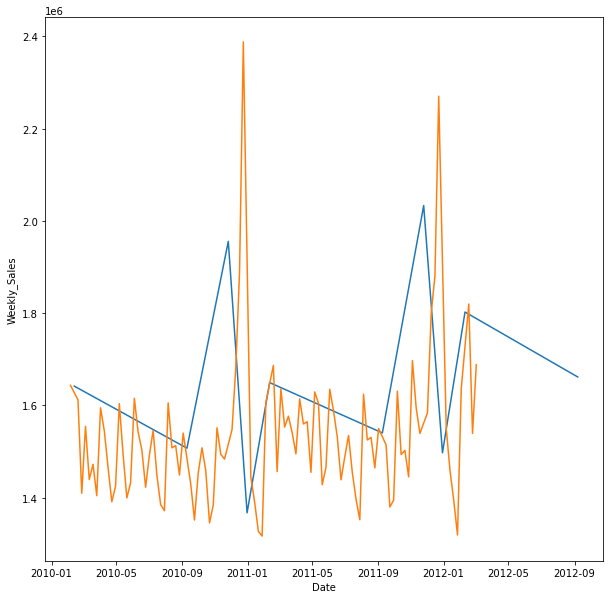

In [49]:
plt.figure(figsize=(10,10))
sns.lineplot(x='Date', y = 'Weekly_Sales', data = holiday_week.head(10), sort=False)
sns.lineplot(x='Date', y = 'Weekly_Sales', data = non_holiday_week.head(100), sort = False)

In [50]:
v=holiday_week.groupby(['Month', 'Year'],sort=False)['Weekly_Sales'].mean()
v1 = pd.DataFrame(v)
v1

,,Weekly_Sales
Month,Year,
2,2010,1.074148e+06
9,2010,1.014098e+06
11,2010,1.462689e+06
12,2010,8.985004e+05
2,2011,1.051915e+06
9,2011,1.039183e+06
11,2011,1.479858e+06
12,2011,1.023166e+06
2,2012,1.111320e+06


In [51]:
val = non_holiday_week.groupby(['Month', 'Year'],sort=False)['Weekly_Sales'].mean()
val1 = pd.DataFrame(val)
val1.head()


,,Weekly_Sales
Month,Year,
2,2010,1.051824e+06
3,2010,1.010666e+06
4,2010,1.028499e+06
5,2010,1.037283e+06
6,2010,1.068034e+06


## fig 1 monthwise histogram of Weekly_Sales in year 2010 acorss all the 45 stores

## fig 2 weekly_Sales where Fall Sem is doing fairly better

<Figure size 432x288 with 0 Axes>

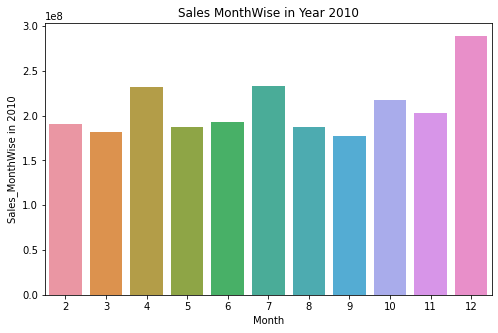

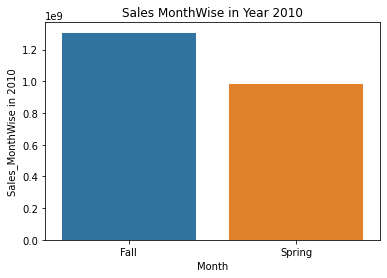

<Figure size 432x288 with 0 Axes>

In [54]:
groups = walmart_store.groupby('Year')[['Month','Store', 'Weekly_Sales', 'Date']]
group2010 = groups.get_group(2010)
gr = group2010.groupby('Month')
month_2010 = [2,3,4,5,6,7,8,9,10,11,12]
sale_monthWise = []

for i in month_2010:
    val = gr.get_group(i)['Weekly_Sales'].sum()
    sale_monthWise.append(val)
 
month_fallSem  = [7,8,9,10,11,12]
month_springsem = [2,3,4,5,6]
total_spring = sum(sale_monthWise[0:5])
total_fall   = sum(sale_monthWise[5:])
semwise =[total_fall,total_spring]
semval = ['Fall', 'Spring']

plt.figure(figsize=(8,5))
plt.xlabel("Month")
plt.ylabel("Sales_MonthWise in 2010")
plt.title('Sales MonthWise in Year 2010')
sns.barplot(x=month_2010,y=sale_monthWise)
plt.figure()
sns.barplot(x=semval, y = semwise)
plt.xlabel("Month")
plt.ylabel("Sales_MonthWise in 2010")
plt.title('Sales MonthWise in Year 2010')
plt.figure()

## Last Two Plots Talks about the how sales are varying in month of december. On plotting we found out that Because of Christmas we have more sales during the month of december. Provided that these sales beating the sales of the month feb when superbowl was organised. Which is putting fall sem ahead of Spring sem Collectively



# 2010 

<AxesSubplot:xlabel='Date', ylabel='Weekly_Sales'>

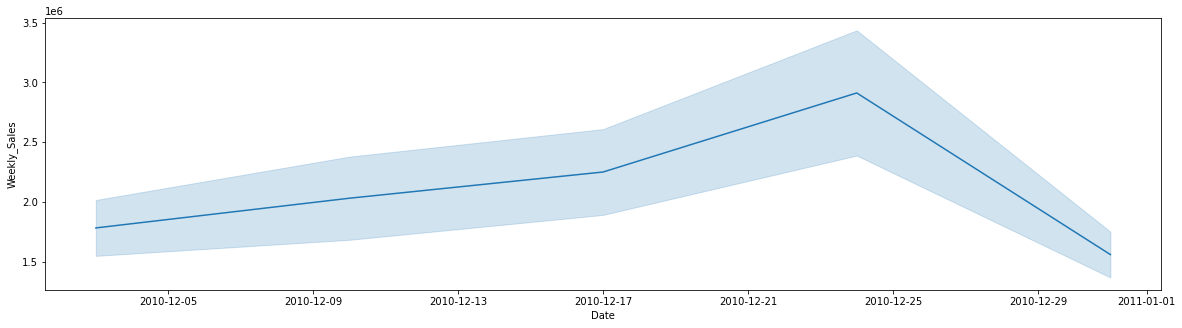

<Figure size 432x288 with 0 Axes>

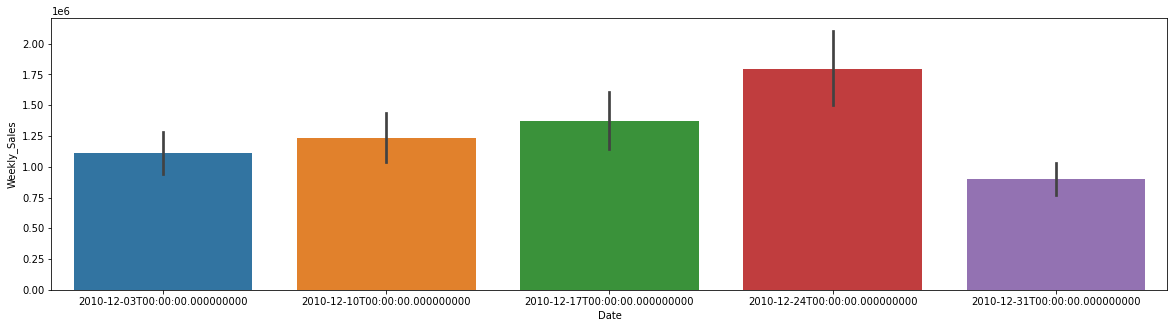

In [56]:
group2010Months = group2010.groupby('Month')[['Weekly_Sales', 'Store', 'Date']]
group2010month12 = group2010Months.get_group(12)
plt.figure(figsize=(20,5))
sns.lineplot(x='Date', y = 'Weekly_Sales', data = group2010month12.head(10))
plt.figure()
plt.figure(figsize=(20,5))
sns.barplot(x='Date', y = 'Weekly_Sales', data = group2010month12)

# 2011

<AxesSubplot:xlabel='Date', ylabel='Weekly_Sales'>

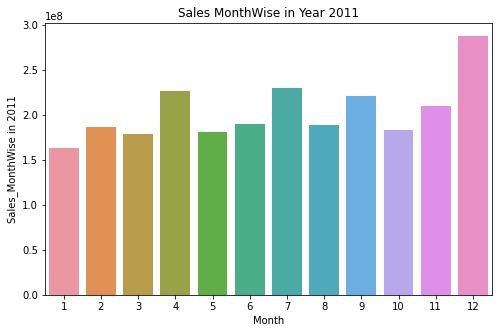

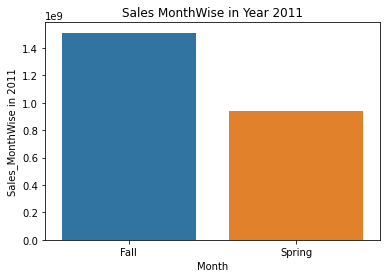

<Figure size 432x288 with 0 Axes>

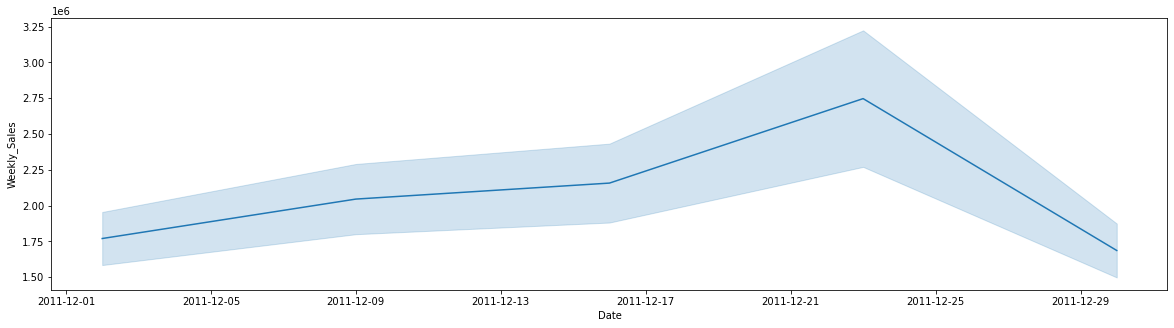

<Figure size 432x288 with 0 Axes>

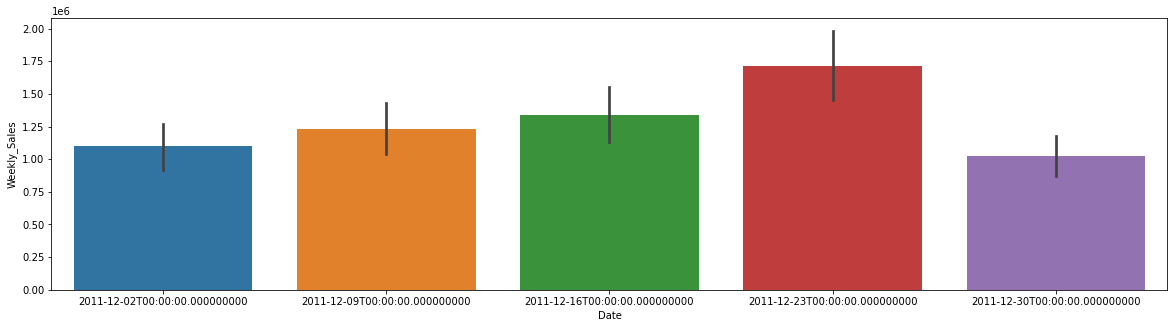

In [58]:
groups = walmart_store.groupby('Year')[['Month','Store', 'Weekly_Sales', 'Date']]
group2011 = groups.get_group(2011)
gr = group2011.groupby('Month')
month_2011 = [1,2,3,4,5,6,7,8,9,10,11,12]
sale_monthWise = []

for i in month_2011:
    val = gr.get_group(i)['Weekly_Sales'].sum()
    sale_monthWise.append(val)
 
month_fallSem  = [7,8,9,10,11,12]
month_springsem = [1,2,3,4,5,6]
total_spring = sum(sale_monthWise[0:5])
total_fall   = sum(sale_monthWise[5:])
semwise =[total_fall,total_spring]
semval = ['Fall', 'Spring']

plt.figure(figsize=(8,5))
plt.xlabel("Month")
plt.ylabel("Sales_MonthWise in 2011")
plt.title('Sales MonthWise in Year 2011')
sns.barplot(x=month_2011,y=sale_monthWise)
plt.figure()
sns.barplot(x=semval, y = semwise)
plt.xlabel("Month")
plt.ylabel("Sales_MonthWise in 2011")
plt.title('Sales MonthWise in Year 2011')
plt.figure()

group2011Months = group2011.groupby('Month')[['Weekly_Sales', 'Store', 'Date']]
group2011month12 = group2011Months.get_group(12)
plt.figure(figsize=(20,5))
sns.lineplot(x='Date', y = 'Weekly_Sales', data = group2011month12.head(10))
plt.figure()
plt.figure(figsize=(20,5))
sns.barplot(x='Date', y = 'Weekly_Sales', data = group2011month12)


# 2012

<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

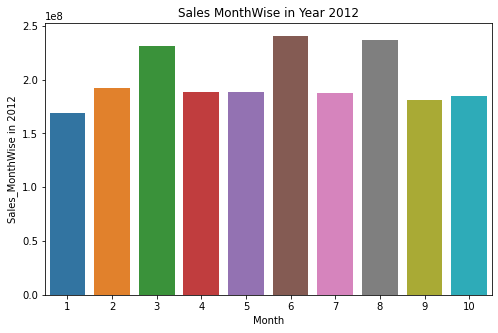

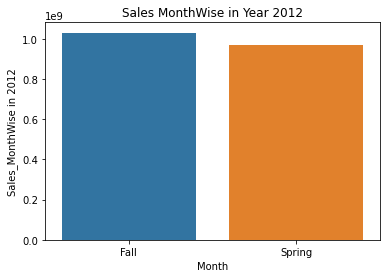

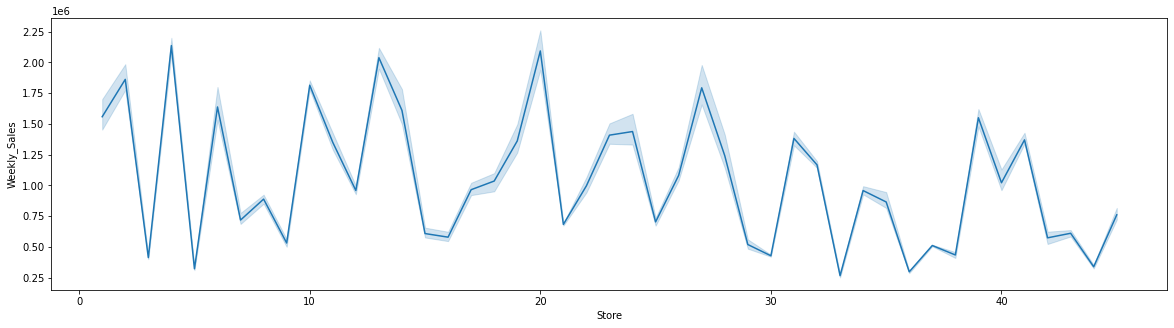

<Figure size 432x288 with 0 Axes>

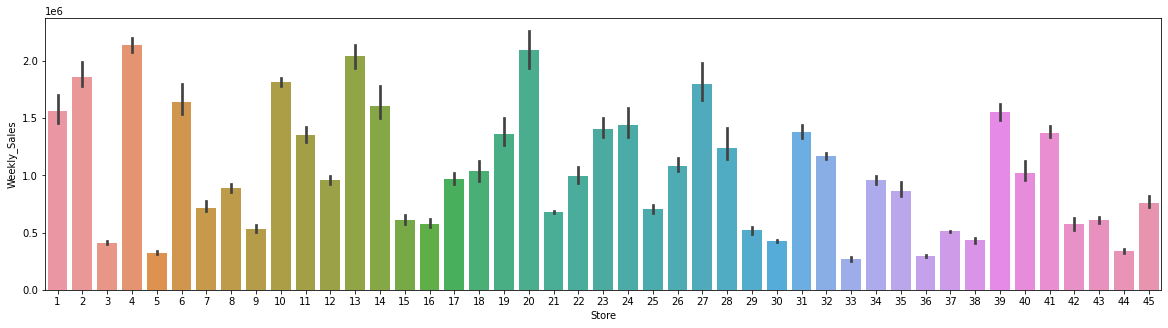

In [59]:
#MonthWise

groups = walmart_store.groupby('Year')[['Month','Store', 'Weekly_Sales', 'Date']]
group2012 = groups.get_group(2012)
gr = group2012.groupby('Month')
month_2012 = [1,2,3,4,5,6,7,8,9,10]
sale_monthWise = []

for i in month_2012:
    val = gr.get_group(i)['Weekly_Sales'].sum()
    sale_monthWise.append(val)
 
month_fallSem  = [7,8,9,10]
month_springsem = [1,2,3,4,5,6]
total_spring = sum(sale_monthWise[0:5])
total_fall   = sum(sale_monthWise[5:])
semwise =[total_fall,total_spring]
semval = ['Fall', 'Spring']

plt.figure(figsize=(8,5))
plt.xlabel("Month")
plt.ylabel("Sales_MonthWise in 2012")
plt.title('Sales MonthWise in Year 2012')
sns.barplot(x=month_2012,y=sale_monthWise)
plt.figure()
sns.barplot(x=semval, y = semwise)
plt.xlabel("Month")
plt.ylabel("Sales_MonthWise in 2012")
plt.title('Sales MonthWise in Year 2012')

#Grouping by month 7 to analyse more which date has more weekly_Sales.
group2012Months = group2012.groupby('Month')[['Weekly_Sales', 'Store', 'Date']]
group2012month7 = group2012Months.get_group(7)
plt.figure(figsize=(20,5))
sns.lineplot(x='Store', y = 'Weekly_Sales', data = group2012month7)
plt.figure()
plt.figure(figsize=(20,5))
sns.barplot(x='Store', y = 'Weekly_Sales', data = group2012month7)

# hypothesis

In [60]:
hypothesis = walmart_store.groupby('Store')[['Fuel_Price','Unemployment', 'CPI','Weekly_Sales', 'Holiday_Flag']]
factors  = hypothesis.get_group(1)
day_arr = [1]
for i in range (1,len(factors)):
    day_arr.append(i*7)
    
factors['Day'] = day_arr.copy()

<ipython-input-60-a02b4e07ecee>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factors['Day'] = day_arr.copy()


In [61]:
factors

,Fuel_Price,Unemployment,CPI,Weekly_Sales,Holiday_Flag,Day
0,2.572,8.106,211.096358,1643690.90,0,1
1,2.548,8.106,211.242170,1641957.44,1,7
2,2.514,8.106,211.289143,1611968.17,0,14
3,2.561,8.106,211.319643,1409727.59,0,21
4,2.625,8.106,211.350143,1554806.68,0,28
...,...,...,...,...,...,...
138,3.666,6.908,222.981658,1437059.26,0,966
139,3.617,6.573,223.181477,1670785.97,0,973
140,3.601,6.573,223.381296,1573072.81,0,980
141,3.594,6.573,223.425723,1508068.77,0,987


<AxesSubplot:>

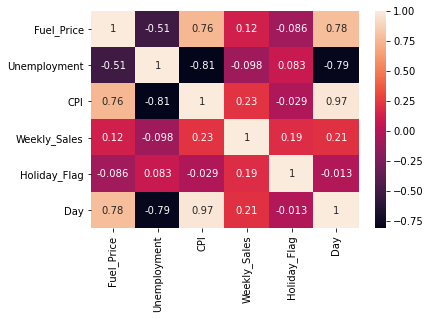

In [62]:
sns.heatmap(factors.corr(), annot = True)

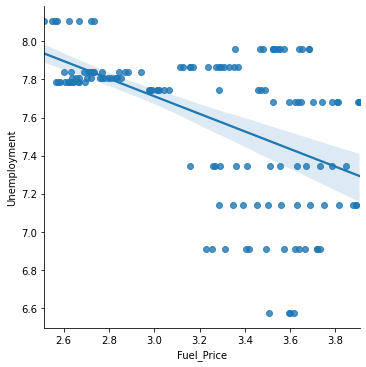

<Figure size 432x288 with 0 Axes>

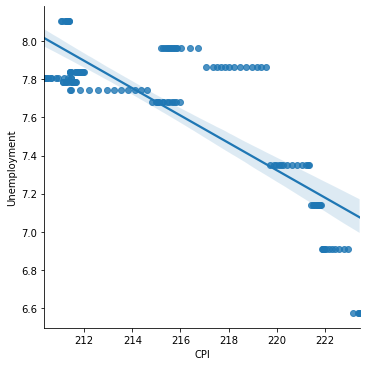

In [63]:
sns.lmplot(x='Fuel_Price', y = 'Unemployment', data = factors)
plt.figure()
sns.lmplot(x='CPI', y = 'Unemployment', data = factors)

# conclussion

#### H0_Cpi : There is no relationship b/w Weekly_Sales and CPI Ha_Cpi 
#### There is some relationship b/w Weekly_Sales and CPI H0_Fuel  
#### There is no relationship b/w Weekly_Sales and Fuel_Price Ha_Fuel 
#### There is some relationship b/w Weekly_Sales and Fuel_Price H0_Unemployment 
#### There is no relationship b/w Weekly_Sales and unemployment Ha_Unemployment 
#### There is some relationship b/w Weekly_Sales and Unemployment

# Hypothesis Testing - CPI

C:\Users\RIBALANG\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


3.106725927640744e-144
reject null hypothesis


<AxesSubplot:xlabel='CPI', ylabel='Weekly_Sales'>

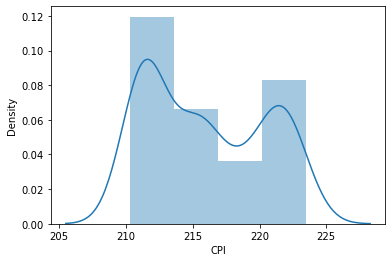

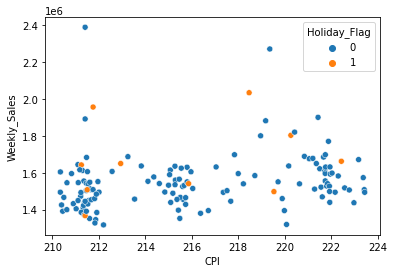

<Figure size 432x288 with 0 Axes>

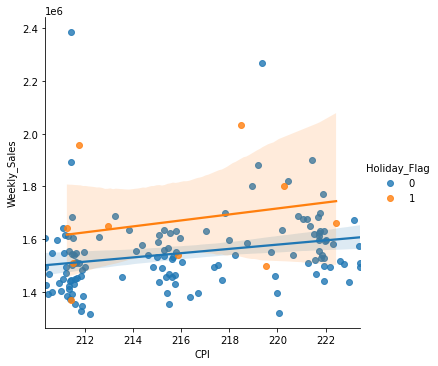

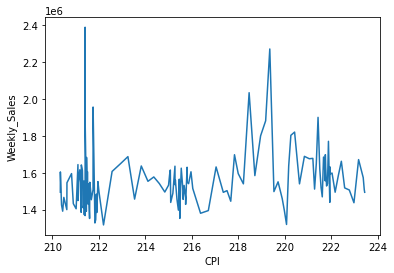

In [64]:
from scipy import stats
ttest,pval = stats.ttest_rel(factors['Weekly_Sales'],factors['CPI'])
sns.distplot(factors.CPI)
plt.figure()
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")
    
sns.scatterplot(x='CPI', y = 'Weekly_Sales', data = factors, hue = 'Holiday_Flag')
plt.figure()
sns.lmplot(x='CPI', y = 'Weekly_Sales', data = factors, hue = 'Holiday_Flag')
plt.figure()
sns.lineplot(x='CPI', y = 'Weekly_Sales', data = factors)

# Hypothesis Testing - Fuel_Price

C:\Users\RIBALANG\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


3.050079726743709e-144
reject null hypothesis


<AxesSubplot:xlabel='Fuel_Price', ylabel='Weekly_Sales'>

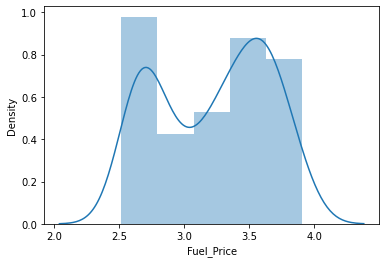

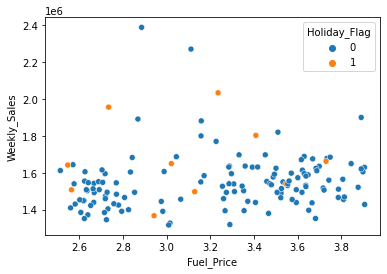

<Figure size 432x288 with 0 Axes>

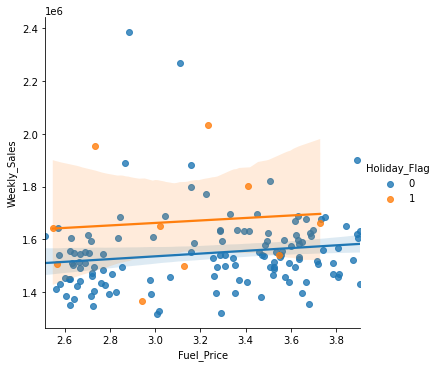

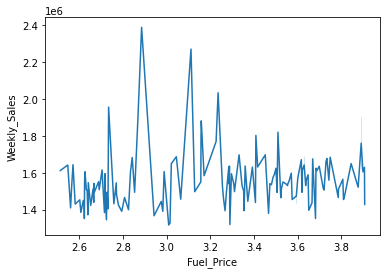

In [65]:
from scipy import stats
ttest,pval = stats.ttest_rel(factors['Weekly_Sales'],factors['Fuel_Price'])
sns.distplot(factors.Fuel_Price)
plt.figure()
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")
    
sns.scatterplot(x='Fuel_Price', y = 'Weekly_Sales', data = factors, hue = 'Holiday_Flag')
plt.figure()
sns.lmplot(x='Fuel_Price', y = 'Weekly_Sales', data = factors, hue = 'Holiday_Flag')
plt.figure()
sns.lineplot(x='Fuel_Price', y = 'Weekly_Sales', data = factors)


# Hypothesis Testing - Uneployment

C:\Users\RIBALANG\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


3.0515405336011733e-144
reject null hypothesis


<AxesSubplot:xlabel='Unemployment', ylabel='Weekly_Sales'>

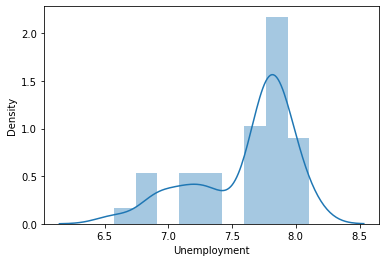

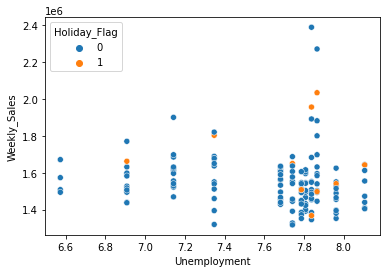

<Figure size 432x288 with 0 Axes>

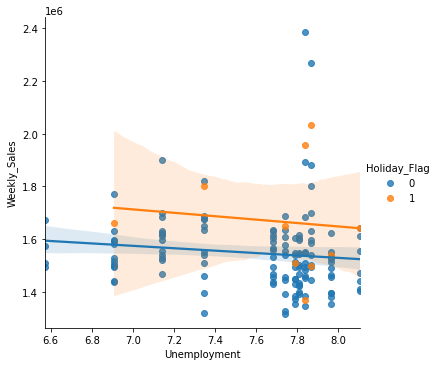

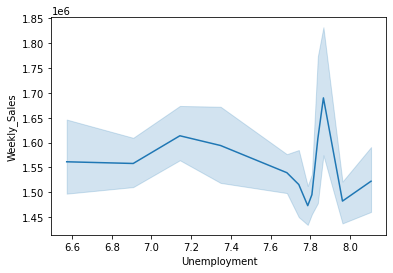

In [68]:
from scipy import stats
ttest,pval = stats.ttest_rel(factors['Weekly_Sales'],factors['Unemployment'])
sns.distplot(factors.Unemployment)
plt.figure()
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")
    
sns.scatterplot(x='Unemployment', y = 'Weekly_Sales', data = factors,hue = 'Holiday_Flag')
plt.figure()
sns.lmplot(x='Unemployment', y = 'Weekly_Sales', data = factors, hue = 'Holiday_Flag')
plt.figure()
sns.lineplot(x='Unemployment', y = 'Weekly_Sales', data = factors)

## Plotting Weekly_sales day wise for store 1, by keeping holidays as a parameter to get more insights

<AxesSubplot:xlabel='Day', ylabel='Weekly_Sales'>

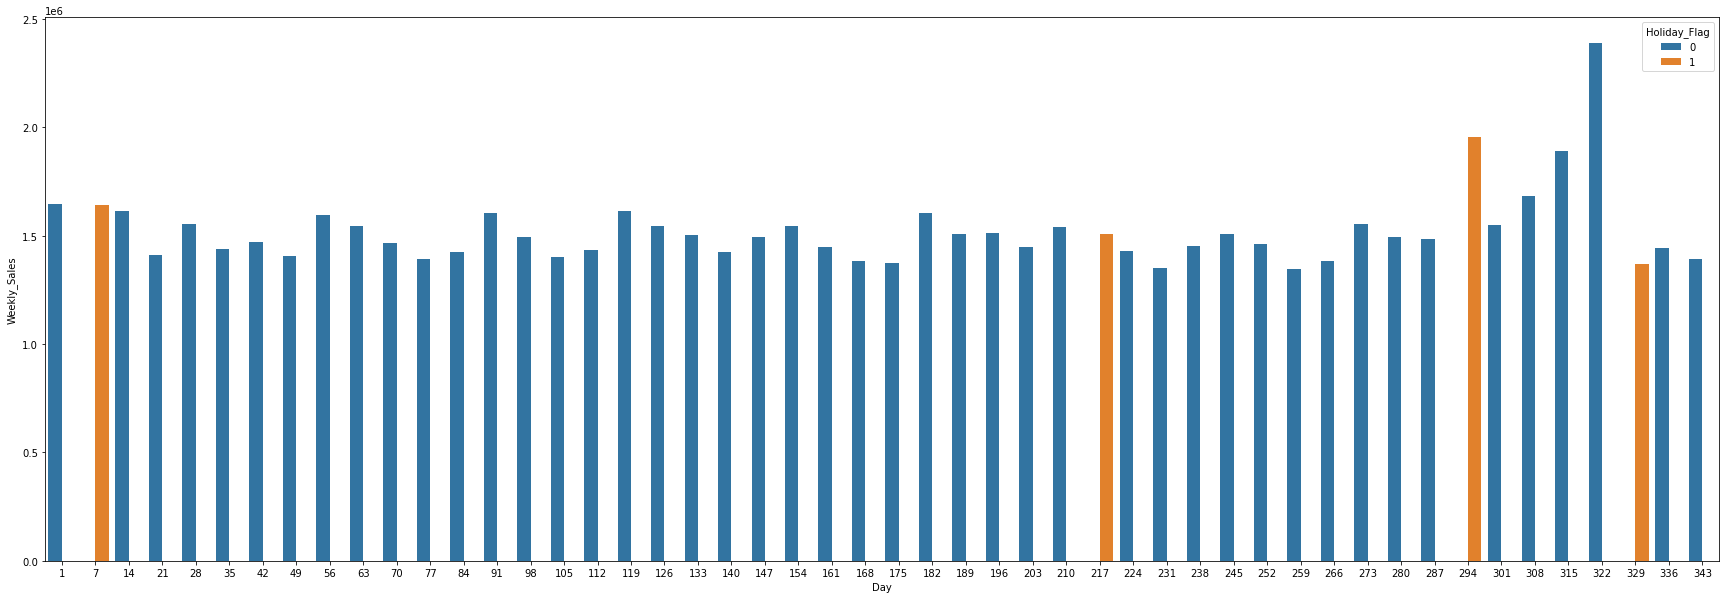

In [69]:
plt.figure(figsize=(30,10))
sns.barplot(x='Day', y = 'Weekly_Sales', data = factors.head(50), hue = 'Holiday_Flag')

In [ ]:
#

# ANALYSIS

#### on the days of holiday there is comparatively more sales for store1, than the whole week. 
#### Customers Prefer going to Stores during a holiday week. 
#### During christmas days the sales have gone really high

# DATA INSIGHTS

CPI, Fuel_Price are positively correlated with Weekly_Sales whereas, rate of Unemployment is fairly negatively correlated and we have seen drop in weekly_sales of Products due to increase of rate of unemployment.

There are quaters in which stores major loss, due to high rate of unemployment, mostly during the spring sem altogether we can expect less weekly_sales as compared to spring semester.

Mostly people try to buy expensive products during the holiday seasons likely to be christmas and Super bowl days where we have seen rise in weekly_sales of Product.

Store 20 is overall doing fine in terms of Weekly_sales, as analysed it is the only store with max weekly_sales, whereas Store 35 has no particular pattern of Weekly_Sales due to high variance observed.

Walmart should invest in marketing of expensive products during the spring sem, to get more customer base for such products, also should only open the supply chain for the prodcuts which are in demand during that season